In [55]:
import pandas
import csv
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer

Análisis exploratorio de datos

In [56]:
data = pandas.read_csv("data/training_v2.csv", decimal=".")

In [57]:
data

,encounter_id,patient_id,hospital_id,hospital_death,age,bmi,elective_surgery,ethnicity,gender,height,...,aids,cirrhosis,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,apache_3j_bodysystem,apache_2_bodysystem
0,66154,25312,118,0,68.0,22.730000,0,Caucasian,M,180.3,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Sepsis,Cardiovascular
1,114252,59342,81,0,77.0,27.420000,0,Caucasian,F,160.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Respiratory,Respiratory
2,119783,50777,118,0,25.0,31.950000,0,Caucasian,F,172.7,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Metabolic,Metabolic
3,79267,46918,118,0,81.0,22.640000,1,Caucasian,F,165.1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Cardiovascular,Cardiovascular
4,92056,34377,33,0,19.0,NaN,0,Caucasian,M,188.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Trauma,Trauma
5,33181,74489,83,0,67.0,27.560000,0,Caucasian,M,190.5,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Neurological,Neurologic
6,82208,49526,83,0,59.0,57.450000,0,Caucasian,F,165.1,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Respiratory,Respiratory
7,120995,50129,33,0,70.0,NaN,0,Caucasian,M,165.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,Sepsis,Cardiovascular
8,80471,10577,118,1,45.0,NaN,0,Caucasian,M,170.2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Cardiovascular,Cardiovascular
9,42871,90749,118,0,50.0,25.710000,0,NaN,M,175.3,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Cardiovascular,Cardiovascular


In [6]:
data.describe()

,encounter_id,patient_id,hospital_id,hospital_death,age,bmi,elective_surgery,height,icu_id,pre_icu_los_days,...,apache_4a_hospital_death_prob,apache_4a_icu_death_prob,aids,cirrhosis,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis
count,91713.000000,91713.000000,91713.000000,91713.000000,87485.000000,88284.000000,91713.000000,90379.000000,91713.000000,91713.000000,...,83766.000000,83766.000000,90998.000000,90998.000000,90998.000000,90998.000000,90998.000000,90998.000000,90998.000000,90998.000000
mean,65606.079280,65537.131464,105.669262,0.086302,62.309516,29.185818,0.183736,169.641588,508.357692,0.835766,...,0.086787,0.043955,0.000857,0.015693,0.225192,0.012989,0.026165,0.007066,0.004132,0.020638
std,37795.088538,37811.252183,62.854406,0.280811,16.775119,8.275142,0.387271,10.795378,228.989661,2.487756,...,0.247569,0.217341,0.029265,0.124284,0.417711,0.113229,0.159628,0.083763,0.064148,0.142169
min,1.000000,1.000000,2.000000,0.000000,16.000000,14.844926,0.000000,137.200000,82.000000,-24.947222,...,-1.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,32852.000000,32830.000000,47.000000,0.000000,52.000000,23.641975,0.000000,162.500000,369.000000,0.035417,...,0.020000,0.010000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,65665.000000,65413.000000,109.000000,0.000000,65.000000,27.654655,0.000000,170.100000,504.000000,0.138889,...,0.050000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,98342.000000,98298.000000,161.000000,0.000000,75.000000,32.930206,0.000000,177.800000,679.000000,0.409028,...,0.130000,0.060000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,131051.000000,131051.000000,204.000000,1.000000,89.000000,67.814990,1.000000,195.590000,927.000000,159.090972,...,0.990000,0.970000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [8]:
data["ethnicity"].value_counts()

Caucasian           70684
African American     9547
Other/Unknown        4374
Hispanic             3796
Asian                1129
Native American       788
Name: ethnicity, dtype: int64

In [9]:
data["gcs_verbal_apache"].value_counts(dropna=False)

5.0    56909
1.0    16741
4.0    10947
3.0     3275
2.0     1940
NaN     1901
Name: gcs_verbal_apache, dtype: int64

In [10]:
data["gcs_verbal_apache"].value_counts(dropna=False)

5.0    56909
1.0    16741
4.0    10947
3.0     3275
2.0     1940
NaN     1901
Name: gcs_verbal_apache, dtype: int64

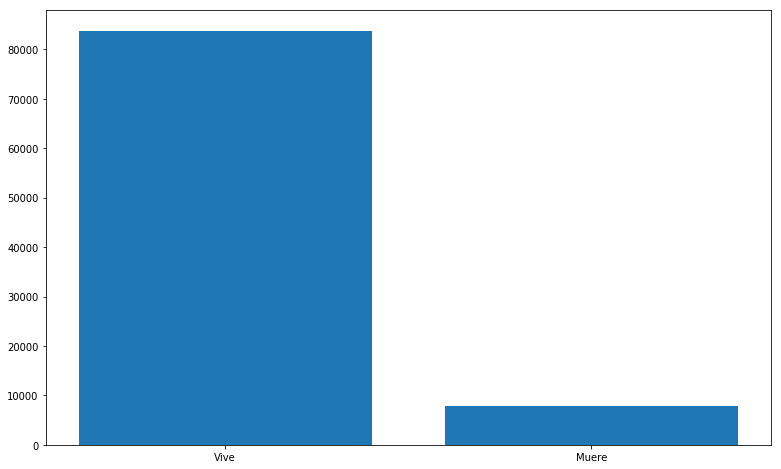

In [11]:
data["hospital_death"].value_counts(dropna=False)
names = ['Vive', 'Muere']
values = data["hospital_death"].value_counts()
plt.figure(figsize=(13, 8))
plt.bar(names, values)
plt.suptitle('')
plt.show()

Imputación de los datos

In [58]:
imp = SimpleImputer(missing_values=np.nan, strategy='median')
variables_mediana =['gcs_motor_apache', 'gcs_eyes_apache', 'gcs_verbal_apache', 'weight', "bmi"
, 'bun_apache', 'creatinine_apache', 'sodium_apache', 'temp_apache', 'wbc_apache', 'd1_diasbp_max', 'd1_diasbp_min', 'd1_diasbp_min', "d1_diasbp_noninvasive_min", "d1_heartrate_max", "d1_heartrate_min", "d1_mbp_max", "d1_mbp_noninvasive_max",  "d1_mbp_noninvasive_min", "d1_resprate_max", "d1_resprate_min", "d1_spo2_max", "d1_spo2_min", "d1_sysbp_max", "d1_sysbp_min", "d1_sysbp_noninvasive_max", "d1_sysbp_noninvasive_min", "d1_temp_max", "d1_temp_min", "h1_diasbp_max", "h1_diasbp_min", "h1_diasbp_noninvasive_max", "h1_diasbp_noninvasive_min", "h1_heartrate_max", "h1_heartrate_min", "h1_mbp_max", "h1_mbp_min", "h1_mbp_noninvasive_max", "h1_mbp_noninvasive_min", "h1_resprate_max", "h1_spo2_max", "h1_spo2_min", "h1_sysbp_max", "h1_sysbp_min", "h1_sysbp_noninvasive_max", "h1_sysbp_noninvasive_min", "h1_temp_max", "h1_temp_min", "d1_bun_max", "d1_bun_min", "d1_calcium_max", "d1_calcium_min", "d1_creatinine_max", "d1_creatinine_min", "d1_glucose_max", "d1_glucose_min", "d1_hco3_max", "d1_hco3_min", "d1_hemaglobin_min", "d1_platelets_max", "d1_platelets_min", "d1_potassium_max", "d1_potassium_min", "d1_sodium_min", "d1_wbc_max", "d1_wbc_min", "apache_4a_hospital_death_prob", "apache_4a_icu_death_prob"]
data_nueva = imp.fit_transform(data[variables_mediana]).T
print(data_nueva.shape)
contador = 0
for i in variables_mediana:
    data[i] = data_nueva[contador]
    contador
    contador=contador+1
    

(68, 91713)


In [59]:
imp = SimpleImputer(strategy='mean')
variables_mean =['age', 'height',  'hematocrit_apache','map_apache', "d1_mbp_min", "d1_hemaglobin_max", "d1_hematocrit_max", "d1_hematocrit_min", "d1_sodium_max"]
data_nueva = imp.fit_transform(data[variables_mean]).T
print(data_nueva.shape)
contador = 0
for i in variables_mean:
    data[i] = data_nueva[contador]
    contador=contador+1

(9, 91713)


In [60]:
imp = SimpleImputer(strategy="most_frequent")
variables_categoricas =[ 'elective_surgery',"ethnicity",'readmission_status', 'apache_post_operative',
 'arf_apache',
 'gcs_unable_apache',
 'intubated_apache',
 'ventilated_apache',
 'aids',
 'cirrhosis',
 'diabetes_mellitus',
 'hepatic_failure',
 'immunosuppression',
 'leukemia',
 'lymphoma',
 'solid_tumor_with_metastasis',
 'ethnicity',
 'gender',
 'hospital_admit_source',
 'icu_admit_source',
 'icu_stay_type',
 'icu_type',
 'apache_3j_bodysystem',
 'apache_2_bodysystem',
 'apache_2_diagnosis', 'apache_3j_diagnosis']
categorias = ['ethnicity','gender',"hospital_admit_source", "icu_admit_source", "solid_tumor_with_metastasis", "icu_stay_type","icu_type", "apache_3j_bodysystem", "apache_2_bodysystem"]
data_nueva = imp.fit_transform(data[variables_categoricas]).T 
print(data_nueva.shape)
contador = 0
for i in variables_categoricas:
    data[i] = data_nueva[contador]
    contador
    contador=contador+1

(26, 91713)


In [15]:
data["apache_3j_bodysystem"].value_counts(dropna=False)

Cardiovascular          31661
Neurological            11896
Sepsis                  11740
Respiratory             11609
Gastrointestinal         9026
Metabolic                7650
Trauma                   3842
Genitourinary            2172
Musculoskeletal/Skin     1166
Hematological             638
Gynecological             313
Name: apache_3j_bodysystem, dtype: int64

In [61]:
result = data.isnull().sum() / 91713
r = result.sort_values(ascending=True) 
data[r[r<=0.3].reset_index()["index"]].to_csv("menor30sinmissing.csv",sep=",", header=True, index=False)
len(set(r[r<=0.00].reset_index()["index"]))

107

In [62]:
#categorias = ['gender']
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
for i in categorias:
    categoria = LabelEncoder()
    data[i + "_encoded"] = categoria.fit_transform(data[i])
    ohe = OneHotEncoder()
    X = ohe.fit_transform(data[i+"_encoded"].values.reshape(-1,1)).toarray()
    dfOneHot = pandas.DataFrame(X, columns = [ i + "_"+str(int(j)) for j in range(X.shape[1])])
    data = pandas.concat([data, dfOneHot], axis=1)
data = data.drop(columns=categorias)    # luego sacar icu_type, icu_stay_type

/media/mdleiton/Respaldo/repositorios/env/lib/python3.5/site-packages/sklearn/preprocessing/_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
/media/mdleiton/Respaldo/repositorios/env/lib/python3.5/site-packages/sklearn/preprocessing/_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warnin

In [15]:
data

,encounter_id,patient_id,hospital_id,hospital_death,age,bmi,elective_surgery,height,icu_id,pre_icu_los_days,...,apache_2_bodysystem_0,apache_2_bodysystem_1,apache_2_bodysystem_2,apache_2_bodysystem_3,apache_2_bodysystem_4,apache_2_bodysystem_5,apache_2_bodysystem_6,apache_2_bodysystem_7,apache_2_bodysystem_8,apache_2_bodysystem_9
0,66154,25312,118,0,68.000000,22.730000,0,180.300000,92,0.541667,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,114252,59342,81,0,77.000000,27.420000,0,160.000000,90,0.927778,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,119783,50777,118,0,25.000000,31.950000,0,172.700000,93,0.000694,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,79267,46918,118,0,81.000000,22.640000,1,165.100000,92,0.000694,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,92056,34377,33,0,19.000000,27.654655,0,188.000000,91,0.073611,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
5,33181,74489,83,0,67.000000,27.560000,0,190.500000,95,0.000694,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
6,82208,49526,83,0,59.000000,57.450000,0,165.100000,95,0.000694,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
7,120995,50129,33,0,70.000000,27.654655,0,165.000000,91,0.002083,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,80471,10577,118,1,45.000000,27.654655,0,170.200000,114,0.009028,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,42871,90749,118,0,50.000000,25.710000,0,175.300000,114,0.060417,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [63]:
result = data.isnull().sum() / 91713
r = result.sort_values(ascending=True) 
data[r[r<=0.3].reset_index()["index"]].to_csv("menor30.csv",sep=",", header=True, index=False)
len(set(r[r<=0.00].reset_index()["index"]))

169

In [19]:
len(r[r<=0.30].reset_index()["index"])

174

In [20]:
data

,encounter_id,patient_id,hospital_id,hospital_death,age,bmi,elective_surgery,height,icu_id,pre_icu_los_days,...,apache_2_bodysystem_0,apache_2_bodysystem_1,apache_2_bodysystem_2,apache_2_bodysystem_3,apache_2_bodysystem_4,apache_2_bodysystem_5,apache_2_bodysystem_6,apache_2_bodysystem_7,apache_2_bodysystem_8,apache_2_bodysystem_9
0,66154,25312,118,0,68.000000,22.730000,0,180.300000,92,0.541667,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,114252,59342,81,0,77.000000,27.420000,0,160.000000,90,0.927778,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,119783,50777,118,0,25.000000,31.950000,0,172.700000,93,0.000694,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,79267,46918,118,0,81.000000,22.640000,1,165.100000,92,0.000694,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,92056,34377,33,0,19.000000,27.654655,0,188.000000,91,0.073611,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
5,33181,74489,83,0,67.000000,27.560000,0,190.500000,95,0.000694,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
6,82208,49526,83,0,59.000000,57.450000,0,165.100000,95,0.000694,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
7,120995,50129,33,0,70.000000,27.654655,0,165.000000,91,0.002083,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,80471,10577,118,1,45.000000,27.654655,0,170.200000,114,0.009028,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,42871,90749,118,0,50.000000,25.710000,0,175.300000,114,0.060417,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [65]:
data2 = data[r[r<=0.00].reset_index()["index"]].drop(columns=["patient_id","encounter_id", "readmission_status"])    # luego sacar icu_type, icu_stay_type

PCA

In [21]:
train_x, test_x, train_y, test_y = train_test_split( data2.drop(columns=["hospital_death"]),  data2["hospital_death"], test_size=0.3, random_state=0)

In [22]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()# Fit on training set only.
train_x = scaler.fit_transform(train_x)
test_x = scaler.transform(test_x)
pca = PCA()
train_x = pca.fit_transform(train_x)
test_x = pca.transform(test_x)

In [23]:
pca.explained_variance_ratio_

array([8.89802572e-02, 4.77522627e-02, 3.92356085e-02, 3.29305199e-02,
       3.07381247e-02, 2.65107321e-02, 2.47141158e-02, 2.24798343e-02,
       2.13245773e-02, 1.99741026e-02, 1.88342295e-02, 1.84219001e-02,
       1.69992709e-02, 1.60918014e-02, 1.57379681e-02, 1.54475942e-02,
       1.40916642e-02, 1.38610869e-02, 1.30100844e-02, 1.29084755e-02,
       1.26016273e-02, 1.23736948e-02, 1.17996279e-02, 1.16320822e-02,
       1.13438475e-02, 1.09112736e-02, 1.08053086e-02, 1.04548016e-02,
       1.02488371e-02, 1.02180761e-02, 9.82136937e-03, 9.44094961e-03,
       9.04049497e-03, 8.84968468e-03, 8.59464410e-03, 8.24782567e-03,
       7.99853383e-03, 7.81975058e-03, 7.72498096e-03, 7.62162169e-03,
       7.42750567e-03, 7.29961327e-03, 7.01356826e-03, 6.81212703e-03,
       6.73375282e-03, 6.70733166e-03, 6.58122570e-03, 6.43865599e-03,
       6.39032504e-03, 6.29000314e-03, 6.21079635e-03, 6.13425364e-03,
       6.12192177e-03, 6.07740455e-03, 6.05762864e-03, 6.05532519e-03,
      

In [24]:
pca = PCA(n_components=5)
train_x = pca.fit_transform(train_x)
test_x = pca.transform(test_x)

Random forest

In [25]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

classifier = RandomForestClassifier(max_depth=4, random_state=0)
classifier.fit(train_x, train_y)

# Predicting the Test set results
y_pred = classifier.predict(test_x)
cm = confusion_matrix(test_y, y_pred)
print(cm)
print('Accuracy' + str(accuracy_score(test_y, y_pred)))

/media/mdleiton/Respaldo/repositorios/env/lib/python3.5/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [27]:
classifier.predict(test_x[:1])

array([0])

In [73]:
data3 =data2.drop(columns=["hospital_death"])
data3

,leukemia,lymphoma,ethnicity_encoded,ethnicity_0,ethnicity_1,ethnicity_2,ethnicity_3,ethnicity_4,ethnicity_5,gender_encoded,...,h1_spo2_min,h1_spo2_max,h1_resprate_max,h1_mbp_noninvasive_min,h1_sysbp_max,h1_sysbp_noninvasive_min,h1_sysbp_min,h1_temp_min,d1_bun_max,h1_temp_max
0,0,0,2,0.0,0.0,1.0,0.0,0.0,0.0,1,...,74.0,100.0,26.0,85.0,131.0,115.0,115.0,37.5,31.0,39.5
1,0,0,2,0.0,0.0,1.0,0.0,0.0,0.0,0,...,70.0,95.0,31.0,57.0,95.0,71.0,71.0,36.3,11.0,36.3
2,0,0,2,0.0,0.0,1.0,0.0,0.0,0.0,0,...,91.0,98.0,20.0,83.0,148.0,124.0,124.0,36.7,19.0,36.7
3,0,0,2,0.0,0.0,1.0,0.0,0.0,0.0,0,...,99.0,100.0,12.0,79.0,136.0,115.0,106.0,34.8,19.0,35.6
4,0,0,2,0.0,0.0,1.0,0.0,0.0,0.0,1,...,100.0,100.0,21.0,92.0,130.0,120.0,120.0,36.6,19.0,36.7
5,0,0,2,0.0,0.0,1.0,0.0,0.0,0.0,1,...,97.0,97.0,12.0,111.0,143.0,143.0,143.0,36.7,13.0,36.7
6,0,0,2,0.0,0.0,1.0,0.0,0.0,0.0,0,...,100.0,100.0,18.0,117.0,191.0,115.0,163.0,35.0,18.0,36.8
7,0,0,2,0.0,0.0,1.0,0.0,0.0,0.0,1,...,92.0,96.0,28.0,60.0,119.0,106.0,106.0,38.5,48.0,38.5
8,0,0,2,0.0,0.0,1.0,0.0,0.0,0.0,1,...,97.0,97.0,24.0,71.0,104.0,98.0,98.0,36.9,15.0,36.9
9,0,0,2,0.0,0.0,1.0,0.0,0.0,0.0,1,...,96.0,100.0,29.0,77.0,135.0,103.0,103.0,36.9,10.0,36.9


In [89]:
import numpy as np
from sklearn.model_selection import StratifiedKFold
skf = StratifiedKFold(n_splits=4)
skf.get_n_splits(data3, data2["hospital_death"])

print(skf)
train_x  = pandas.DataFrame()
test_x = pandas.DataFrame()
train_y = pandas.DataFrame()
test_y =pandas.DataFrame()
contador = 0

for train_index, test_index in skf.split(data3, data2["hospital_death"]):
    train_x = data3.iloc[train_index] 
    test_x = data3.iloc[test_index]
    train_y, test_y = data2["hospital_death"][train_index], data2["hospital_death"][test_index]
    break

StratifiedKFold(n_splits=4, random_state=None, shuffle=False)


In [ ]:
RANDOM FOREST

In [128]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold

model = RandomForestClassifier(max_depth=4, random_state=0, class_weight='balanced')

# Predicting the Test set results
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=5, random_state=1)
# evaluate model
scores = cross_val_score(model, data3, data2["hospital_death"], scoring='recall', cv=cv, n_jobs=-1)
# summarize performance
print('Mean Recall: %.3f' % mean(scores))

"""
model.fit(train_x, train_y)
y_pred = classifier.predict(test_x)
cm = confusion_matrix(test_y, y_pred)
print(cm)
print('Accuracy' + str(accuracy_score(test_y, y_pred)))
"""

Mean Recall: 0.764


"\nmodel.fit(train_x, train_y)\ny_pred = classifier.predict(test_x)\ncm = confusion_matrix(test_y, y_pred)\nprint(cm)\nprint('Accuracy' + str(accuracy_score(test_y, y_pred)))\n"

SVM

In [99]:
#https://machinelearningmastery.com/cost-sensitive-svm-for-imbalanced-classification/
from numpy import mean
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.svm import SVC
# define model
model = SVC(gamma='scale', class_weight='balanced')
# define evaluation procedure
cv = RepeatedStratifiedKFold(n_splits=3, n_repeats=2, random_state=1)
# evaluate model
scores = cross_val_score(model, data3, data2["hospital_death"], scoring='recall', cv=cv, n_jobs=-1)
# summarize performance
print('Mean Recall: %.3f' % mean(scores))

Mean ROC AUC: 0.737


LOGISTIC REGRESSION
https://machinelearningmastery.com/cost-sensitive-logistic-regression/

In [102]:
from numpy import mean
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(solver='lbfgs', class_weight='balanced')
# define evaluation procedure
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# evaluate model
scores = cross_val_score(model, data3, data2["hospital_death"], scoring='recall', cv=cv, n_jobs=-1)
# summarize performance
print('Mean recall: %.3f' % mean(scores))

Mean recall: 0.735


Naive Classifier
https://machinelearningmastery.com/naive-classifiers-imbalanced-classification-metrics/

In [108]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
# define evaluation procedure
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)
# evaluate model
#scores = cross_val_score(model, data3, data2["hospital_death"], scoring='recall', cv=cv, n_jobs=-1)
# summarize performance
print(scores)
#print('Mean recall: %.3f' % )

[0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 1. 0.]


>Uniform 0.494 (0.009)
>Majority 0.000 (0.000)
>Minority 1.000 (0.000)


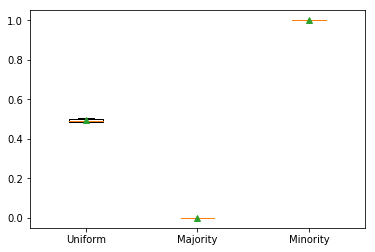

In [124]:
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.dummy import DummyClassifier
from matplotlib import pyplot

# evaluate a model
def evaluate_model(X, y, model):
    cv = RepeatedStratifiedKFold(n_splits=3, n_repeats=2, random_state=1)
    scores = cross_val_score(model, X, y, scoring='recall', cv=cv, n_jobs=-1)
    return scores

# define models to test
def get_models():
    models, names = list(), list()
    models.append(DummyClassifier(strategy='uniform'))
    names.append('Uniform')
    # Majority Class: Predict 0
    models.append(DummyClassifier(strategy='most_frequent'))
    names.append('Majority')
    # Minority Class: Predict 1
    models.append(DummyClassifier(strategy='constant', constant=1))
    names.append('Minority')
    return models, names

models, names = get_models()
results = list()
# evaluate each model
for i in range(len(models)):
    # evaluate the model and store results
    scores = evaluate_model(data3, data2["hospital_death"], models[i])
    results.append(scores)
    # summarize and store
    print('>%s %.3f (%.3f)' % (names[i], mean(scores), std(scores)))
# plot the results
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

In [ ]:
kkn


In [ ]:
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier()
n_neighbors = range(1, 10, 3)
weights = ['uniform', 'distance']
metric = ['euclidean', 'manhattan', 'minkowski']
# define grid search
grid = dict(n_neighbors=n_neighbors,weights=weights,metric=metric)
cv = RepeatedStratifiedKFold(n_splits=3, n_repeats=2, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='recall',error_score=0)
grid_result = grid_search.fit(data3, data2["hospital_death"])
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Bagged Decision Trees (Bagging)
https://machinelearningmastery.com/hyperparameters-for-classification-machine-learning-algorithms/

In [ ]:
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import BaggingClassifier
# define models and parameters
model = BaggingClassifier()
n_estimators = [10, 100, 1000]
# define grid search
grid = dict(n_estimators=n_estimators)
cv = RepeatedStratifiedKFold(n_splits=3, n_repeats=2, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='recall',error_score=0)
grid_result = grid_search.fit(data3, data2["hospital_death"])
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

In [ ]:
Stochastic Gradient Boosting

In [ ]:
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier

model = GradientBoostingClassifier()
n_estimators = [10, 100]
subsample = [0.5, 0.7, 1.0]
max_depth = [3, 9]
# define grid search
grid = dict(n_estimators=n_estimators, subsample=subsample, max_depth=max_depth)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(data3, data2["hospital_death"])
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

# redes neuronales

In [48]:
# https://machinelearningmastery.com/tutorial-first-neural-network-python-keras/
# https://machinelearningmastery.com/grid-search-hyperparameters-deep-learning-models-python-keras/

In [120]:
import numpy
from sklearn.model_selection import GridSearchCV
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier

from keras import backend as K

def recall_m(y_true, y_pred):
        true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
        possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
        recall = true_positives / (possible_positives + K.epsilon())
        return recall


def create_model(optimizer='adam', neurons=80):
    # define the keras model
    model = Sequential()
    model.add(Dense(180, input_dim=165, activation='relu'))
    model.add(Dense(neurons, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    # compile the keras model
    model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=[recall_m])
    return model

In [121]:
# fit the keras model on the dataset
model = create_model()
model.fit(train_x, train_y, epochs=20, batch_size=500, class_weight='balanced')

Epoch 1/20
68784/68784 [==============================] - 4s 65us/step - loss: 1.4382 - recall_m: 0.0047
Epoch 2/20
68784/68784 [==============================] - 4s 55us/step - loss: 1.3910 - recall_m: 0.0000e+00
Epoch 3/20
68784/68784 [==============================] - 4s 55us/step - loss: 1.3910 - recall_m: 0.0000e+00
Epoch 4/20
68784/68784 [==============================] - 4s 55us/step - loss: 1.3910 - recall_m: 0.0000e+00
Epoch 5/20
68784/68784 [==============================] - 4s 60us/step - loss: 1.3910 - recall_m: 0.0000e+00
Epoch 6/20
68784/68784 [==============================] - 4s 58us/step - loss: 1.3910 - recall_m: 0.0000e+00
Epoch 7/20
68784/68784 [==============================] - 4s 59us/step - loss: 1.3910 - recall_m: 0.0000e+00
Epoch 8/20
68784/68784 [==============================] - 4s 56us/step - loss: 1.3910 - recall_m: 0.0000e+00
Epoch 9/20
68784/68784 [==============================] - 4s 62us/step - loss: 1.3910 - recall_m: 0.0000e+00
Epoch 10/20
68784/68784

In [118]:
s, acc , recall = model.evaluate(test_x, test_y, verbose=0)
print(s)
print(recall)
print(acc)

ValueError: not enough values to unpack (expected 3, got 2)

In [119]:
from sklearn.metrics import *
yhat_probs = model.predict(test_x, verbose=0)
yhat_classes = model.predict_classes(test_x, verbose=0)
yhat_probs = yhat_probs[:, 0]
yhat_classes = yhat_classes[:, 0]

accuracy = accuracy_score(test_y, yhat_classes)
print('Accuracy: %f' % accuracy)
precision = precision_score(test_y, yhat_classes , average='binary')
print('Precision: %f' % precision)

recall = recall_score(test_y, yhat_classes, average='binary')
print('Recall: %f' % recall)
f1 = f1_score(test_y, yhat_classes,average='binary')
print('F1 score: %f' % f1)

auc = roc_auc_score(test_y, yhat_probs)
print('ROC AUC: %f' % auc)
matrix = confusion_matrix(test_y, yhat_classes)
print(matrix)

Accuracy: 0.913690
Precision: 0.000000
Recall: 0.000000
F1 score: 0.000000
ROC AUC: 0.500000
[[20950     0]
 [ 1979     0]]


/media/mdleiton/Respaldo/repositorios/env/lib/python3.5/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/media/mdleiton/Respaldo/repositorios/env/lib/python3.5/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


Cost-Sensitive Neural Network
https://machinelearningmastery.com/cost-sensitive-neural-network-for-imbalanced-classification/

In [114]:
# fix random seed for reproducibility
seed = 7
numpy.random.seed(seed)
model = KerasClassifier(build_fn=create_model, verbose=0)
# define the grid search parameters
optimizer = ['SGD', 'RMSprop', 'Adagrad', 'Adadelta', 'Adam', 'Adamax', 'Nadam']
batch_size = [2000]
neurons = [60,80]
epochs = [20]
param_grid = dict(batch_size=batch_size, epochs=epochs, neurons=neurons)
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3)
grid_result = grid.fit(train_x, train_y, class_weight='balanced')
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.913686 using {'neurons': 60, 'epochs': 20, 'batch_size': 2000}
0.913686 (0.010345) with: {'neurons': 60, 'epochs': 20, 'batch_size': 2000}
0.629507 (0.393044) with: {'neurons': 80, 'epochs': 20, 'batch_size': 2000}


In [ ]:
https://machinelearningmastery.com/tour-of-evaluation-metrics-for-imbalanced-classification/

In [ ]:
Stacking voting